# Use-case: A shopping mall company has provided you this dataset. They want to create new strategy for enhancing the sales figure

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#To view the graph in jupyter notebook

In [49]:
data = pd.read_csv('Mall_Customers.csv')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
data.columns = ['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']

In [53]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
#Visual EDA
#Initially perform EDA only with numeric columns

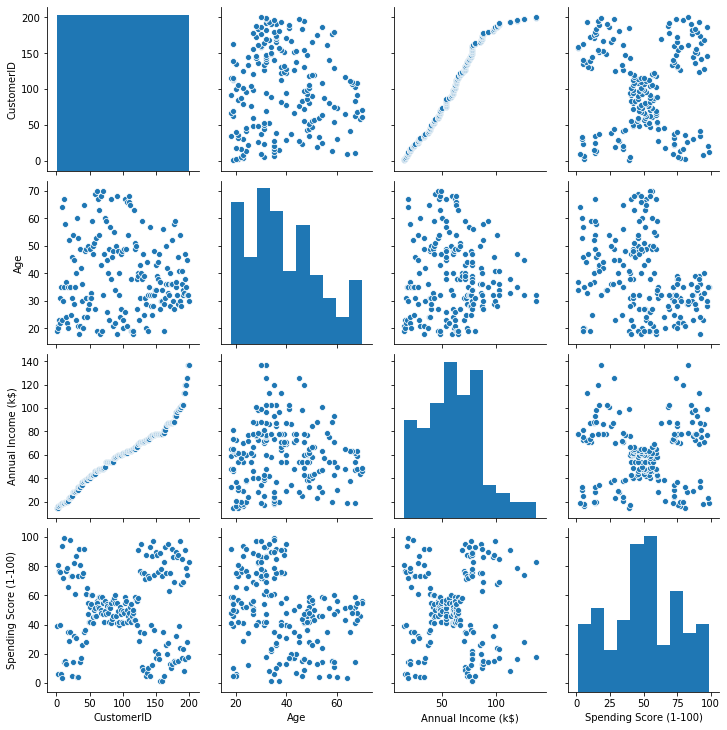

In [55]:
sns.pairplot(data)

In [ ]:
# CustomerID v/s Spending Score
# Age v/s Spending Score
# Annual Income v/s Spending

In [56]:
# Annual Income v/s Spending Score
#Here on the basis of Visual EDA we consider k = 5

In [57]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [58]:
#Create Feature numpy array
features  = data.iloc[:,[3,4]].values

In [59]:
#Implement KMeans on features
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5)
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
group = model.predict(features)

In [61]:
FinalDataSet = data
FinalDataSet['group'] = group
FinalDataSet.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


C:\Users\ANOOP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[]

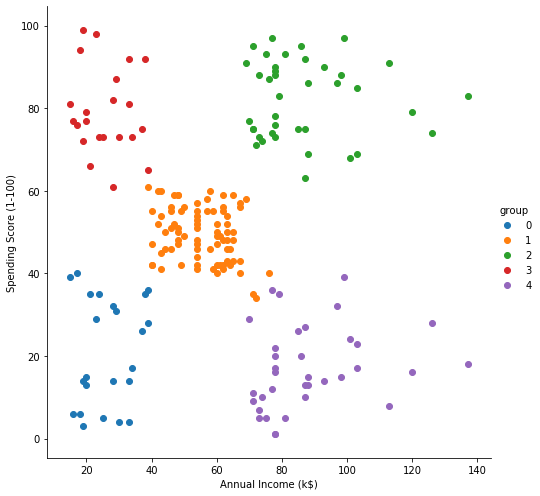

In [62]:
sns.FacetGrid(FinalDataSet, hue='group', size=7)\
   .map(plt.scatter, "Annual Income (k$)", "Spending Score (1-100)") \
   .add_legend()
plt.plot()

In [63]:
#You can verify whether the k was really ideal or not !!!
#Elbow Method
# For each k value we will plot the error rate(misclassification rate)
# using a formula (WCSS - WithIn Cluster Sum of Squares)

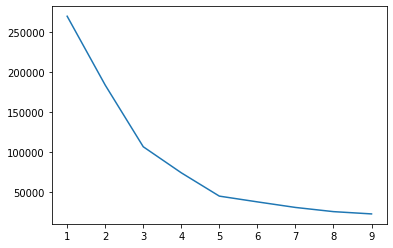

In [64]:
from sklearn.cluster import KMeans
errorValue = []
for i in range(1,10):
    m1= KMeans(n_clusters=i)
    m1.fit(features)
    errorValue.append(m1.inertia_)
        
plt.plot(range(1,10),errorValue)        

In [65]:
# Age v/s Spending Score
#Here on the basis of Visual EDA we consider k = 2

In [70]:
feature2 = data.iloc[:,[2,4]]

In [77]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4) #On the basis of EDA, k=5
model.fit(feature2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
group2 = model.predict(feature2)

In [79]:
FinalDataSet = data
FinalDataSet['group2'] = group2
FinalDataSet.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),group,group2
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,0,3


C:\Users\ANOOP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[]

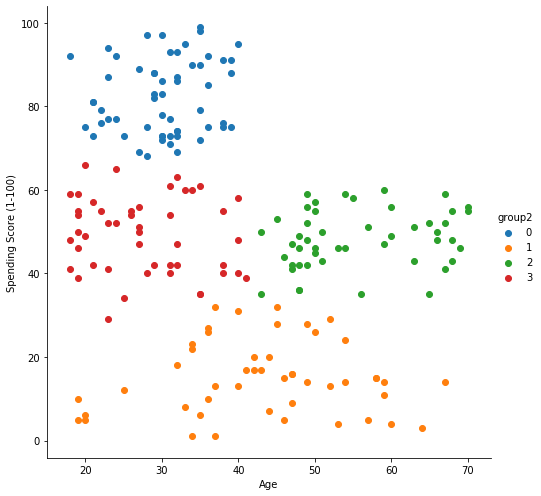

In [80]:
sns.FacetGrid(FinalDataSet, hue='group2', size=7)\
   .map(plt.scatter, "Age", "Spending Score (1-100)") \
   .add_legend()
plt.plot()

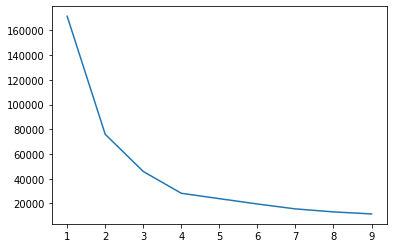

In [81]:
from sklearn.cluster import KMeans
errorValue = []
for i in range(1,10):
    m1= KMeans(n_clusters=i)
    m1.fit(feature2)
    errorValue.append(m1.inertia_)
        
plt.plot(range(1,10),errorValue) 

In [ ]:
# Annual Income v/s Spending
#Here on the basis of Visual EDA we consider k = 5

In [93]:
feature3 = data.iloc[:,[0,4]]

In [94]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4)
model.fit(feature3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [95]:
group3 = model.predict(feature3)

In [96]:
FinalDataSet = data
FinalDataSet['group3'] = group3
FinalDataSet.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),group,group2,group3
0,1,Male,19,15,39,0,3,3
1,2,Male,21,15,81,3,0,3
2,3,Female,20,16,6,0,1,3
3,4,Female,23,16,77,3,0,3
4,5,Female,31,17,40,0,3,3


C:\Users\ANOOP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[]

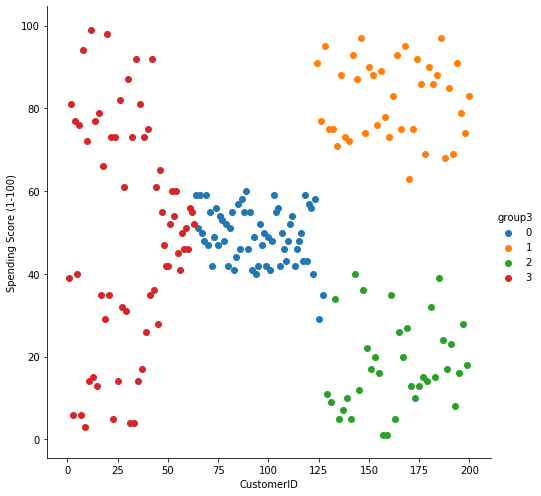

In [97]:
sns.FacetGrid(FinalDataSet, hue='group3', size=7)\
   .map(plt.scatter,'CustomerID','Spending Score (1-100)') \
   .add_legend()
plt.plot()

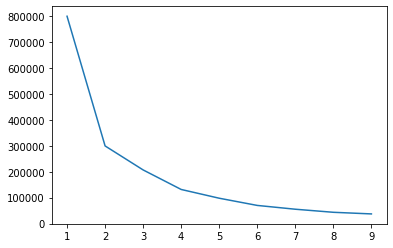

In [98]:
from sklearn.cluster import KMeans
errorValue = []
for i in range(1,10):
    m1= KMeans(n_clusters=i)
    m1.fit(feature3)
    errorValue.append(m1.inertia_)
        
plt.plot(range(1,10),errorValue) 